# Movie % Domestic Gross
![movie-percent-domestic-gross-1](img/movie-percent-domestic-gross-1.png)
![movie-percent-domestic-gross-2](img/movie-percent-domestic-gross-2.png)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

import os

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = 8, 4
sns.set_style('darkgrid')

# import re

In [3]:
os.getcwd()

'/Users/kamil/Documents/insomnyak-llc/development/python-dev/udemy_data_science_course_5499048/assigments'

In [4]:
data = pd.read_csv('../data/P4-Section6-Homework-Dataset.csv', encoding = "ISO-8859-1")

In [5]:
data.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day of Week               608 non-null object
Director                  608 non-null object
Genre                     608 non-null object
Movie Title               608 non-null object
Release Date              608 non-null object
Studio                    608 non-null object
Adjusted Gross ($mill)    608 non-null object
Budget ($mill)            608 non-null float64
Gross ($mill)             608 non-null object
IMDb Rating               608 non-null float64
MovieLens Rating          608 non-null float64
Overseas ($mill)          608 non-null object
Overseas%                 608 non-null float64
Profit ($mill)            608 non-null object
Profit%                   608 non-null float64
Runtime (min)             608 non-null int64
US ($mill)                608 non-null float64
Gross % US                608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ 

In [7]:
data.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [59]:
studioFilter = data.Studio.isin(['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox'])
genreFilter = data.Genre.isin(['action', 'comedy', 'adventure', 'animation', 'drama'])

dataFiltered = data[studioFilter & genreFilter]

dataFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 606
Data columns (total 18 columns):
Day of Week               423 non-null object
Director                  423 non-null object
Genre                     423 non-null object
Movie Title               423 non-null object
Release Date              423 non-null object
Studio                    423 non-null object
Adjusted Gross ($mill)    423 non-null object
Budget ($mill)            423 non-null float64
Gross ($mill)             423 non-null object
IMDb Rating               423 non-null float64
MovieLens Rating          423 non-null float64
Overseas ($mill)          423 non-null object
Overseas%                 423 non-null float64
Profit ($mill)            423 non-null object
Profit%                   423 non-null float64
Runtime (min)             423 non-null int64
US ($mill)                423 non-null float64
Gross % US                423 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 62.8+ 

In [60]:
dataFiltered.Genre = dataFiltered.Genre.astype('category')
# dataFiltered.Genre = dataFiltered.Genre.cat.as_ordered()
dataFiltered.Studio = dataFiltered.Studio.astype('category')

print(
    dataFiltered.Genre.cat.categories,
    dataFiltered.Studio.cat.categories,
    sep='\n'
)

Index(['action', 'adventure', 'animation', 'comedy', 'drama'], dtype='object')
Index(['Buena Vista Studios', 'Fox', 'Paramount Pictures', 'Sony', 'Universal',
       'WB'],
      dtype='object')


In [61]:
def createList(obj):
    values = list()
    for x in obj:
        values.append(x)
    return values 

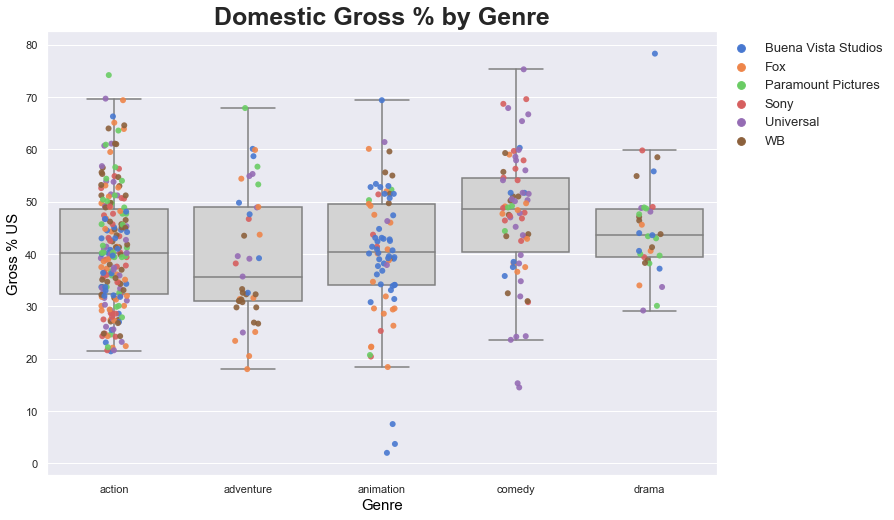

In [73]:
# Gross % US by Genre, grouped by Studio

sns.set_style('darkgrid', {'grid.color': '1', 'grid.linestyle': '-', 'axes.grid': True})

fig, axes = plt.subplots(2, constrained_layout=False)

fig.set_size_inches(12, 18)
axes[0].grid(axis='x')

p1 = sns.boxplot(data=dataFiltered, x='Genre', y='Gross % US', ax=axes[0], color='LightGray', showfliers=False)
# fliers are outlier data points
# p2 = sns.catplot(data=dataFiltered, x='Genre', y='Gross % US', hue='Studio', ax=axes[0])
p2 = sns.stripplot(data=dataFiltered, x='Genre', y='Gross % US', hue='Studio', ax=axes[0], jitter=True, size=6, alpha=0.9)

axes[0].set_title('Domestic Gross % by Genre', fontsize=25, fontweight='bold')
axes[0].set_ylabel('Gross % US', fontsize=15, color='Black')
axes[0].set_xlabel('Genre', fontsize=15, color='Black')
axes[0].legend(prop={'size': 13}, frameon=False, fancybox=False, shadow=False, framealpha=1, bbox_to_anchor=(1,1))

axes[1].remove()

plt.show()

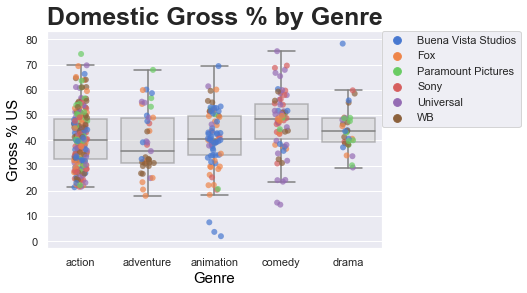

In [64]:
sns.set(style='darkgrid', palette='muted', color_codes=True)

ax = sns.boxplot(data=dataFiltered, x='Genre', y='Gross % US', orient='v', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

sns.stripplot(data=dataFiltered, x='Genre', y='Gross % US', jitter=True, size=6, linewidth=0, hue='Studio', alpha=0.7)

ax.axes.set_title('Domestic Gross % by Genre', fontsize=25, fontweight='bold')
ax.set_xlabel('Genre', fontsize=15, color='Black')
ax.set_ylabel('Gross % US', fontsize=15, color='Black')

ax.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0)

plt.show()